# SPCartopy Tutorial

Nathan Wendt ([email](mailto:nathan.wendt@noaa.gov)) ([@nawendt](https://www.twitter.com/nawendt))  
Meteorologist  
[NWS SPC](https://www.spc.noaa.gov)

### What is SPCartopy?

SPCartopy is a Python package that makes plotting SPC convective outlooks relatively simple. It accomplishes this by extending features that are built into the map plotting package, [cartopy](https://scitools.org.uk/cartopy/docs/latest/). What follows is basic tutorial on how you can use SPCartopy to make plots. Thanks for checking it out and enjoy!

### SPCartopy Feature Classes

The most fundamental pieces of SPCartopy are the extensions to the `cartopy.Feature` class that you can add to your cartopy maps. SPCartopy features are just like the Natural Earth features you most commonly see in any Cartopy examples, but they retrieve SPC outlook geoJSON. A big thanks to Patrick Marsh and Chris Karstens for their work on getting SPC outlooks in geoJSON format. Without that work, this package would not be possible (or at least not as straightforward). Currently, only convective outlooks are available in geoJSON format and this is only since **October 17, 2019**. Older outlook may be added to the archive in the future, particularly if there is a need from SPC users.

Each day that the SPC forecasts for (1&ndash;8) has its own SPCartopy feature. To import them, as has been done above, simply do:

```python
from spcartopy.feature import Day1ConvectiveOutlookFeature
# or  
from spcartopy.feature import Day2ConvectiveOutlookFeature
#...
```

and so on for any of the days you will end up plotting.

Each `ConvectiveOutlookFeature` subclass takes a few standard arguments with some variation depending on the what day's forecast you are interested in plotting. The arguments are `ftime`, `year`, `month`, `day`, and `hazard`. Below is a table of the parameters for this class and what options are valid:

| Parameter | Description |
| :- | :- |
| ftime | Forecast time. This refers to the time the product was issued in UTC. For Day 1 products,<br>valid inputs are 100, 600, 1200, 1630, and 2000. Day 2, 600 and 1730. Day 3, 730.<br>Days 4 to 8 do not require an ftime. |
| year | Outlook year |
| month | Outlook month |
| day | Outlook day |
| hazard | The hazard you want to plot. On Day 1 and Day 2 outlooks, use 'cat' (for categorical),<br>'hail', 'wind', or 'torn'. For the individual hazards, you can also use 'sighail', 'sigwind', and 'sigtorn'<br>to plot the hatched areas. For Day 3, 'cat' can also be used, but individual hazards are not<br>forecast on Day 3. You can only plot probability of *any* severe hazard by using 'prob'.<br>Use 'sigprob' for plotting hatched areas for Day 3. Days 4 to 8 do not have any categories,<br>only probabilities. No hazard is required as it is input automatically for the extended convective outlooks. |

Additional keyword arguments can also be used and will be passed to the cartopy/matplotlib plotting methods. An example keyword argument you might use is `linewidth` which will affect the width of the border of each plotted polygon. The good news is that SPCartopy sets most of these parameters for you to values that give the plots that "SPC look". Of course, you can override those values as you see fit.

### Using ConvectiveOutlookFeature with cartopy and maplotlib

Now to do some practical applications. The outlooks that are plotted are all valid for April 12, 2020. This day is good example to use as it will allow us to plot several days worth of outlooks so as to see the process for multiple outlook products.

In [1]:
import cartopy.crs as ccrs
from cartopy import feature
from cartopy.feature import COLORS
from cartopy.io import shapereader
import matplotlib.pyplot as plt

from spcartopy.feature import (Day1ConvectiveOutlookFeature, Day2ConvectiveOutlookFeature,
                               Day3ConvectiveOutlookFeature, Day4ConvectiveOutlookFeature,
                               Day5ConvectiveOutlookFeature)
from spcartopy.legends import SPCLegend

Before we go any further, let's define a map projection for our plots. Lamber Conformal Conic does a nice job for the mid-latitudes so we will use that.

In [2]:
PROJ = ccrs.LambertConformal(central_longitude=-95, central_latitude=0, standard_parallels=(33, 45))

#### Day 1 Categorical

Text(0.5, 0.95, '4-12-20 Day 1 Categorical Convective Outlook')

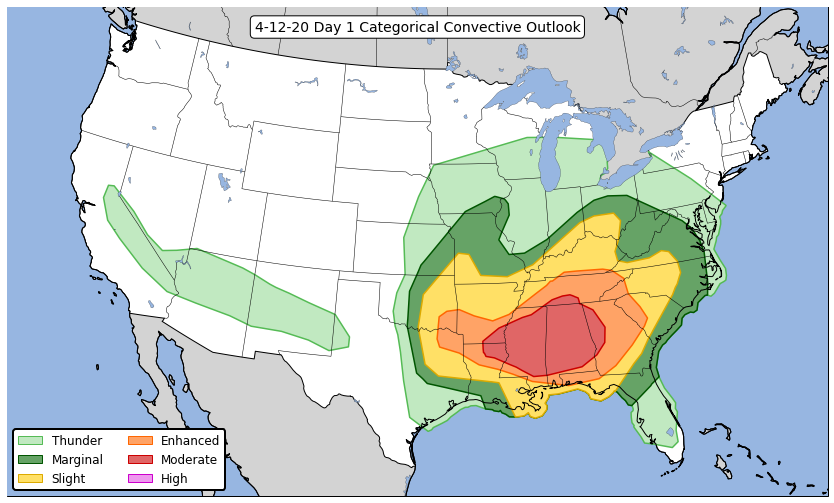

In [3]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

cof = Day1ConvectiveOutlookFeature(1630,2020,4,12,'cat', zorder=3, linewidth=1.5)
ax.add_feature(cof)

leg = SPCLegend.convectiveCategorical()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-12-20 Day 1 Categorical Convective Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

#### Day 1 Probabilistic Hail

Text(0.5, 0.95, '4-12-20 Day 1 Probabilistic Hail Outlook')

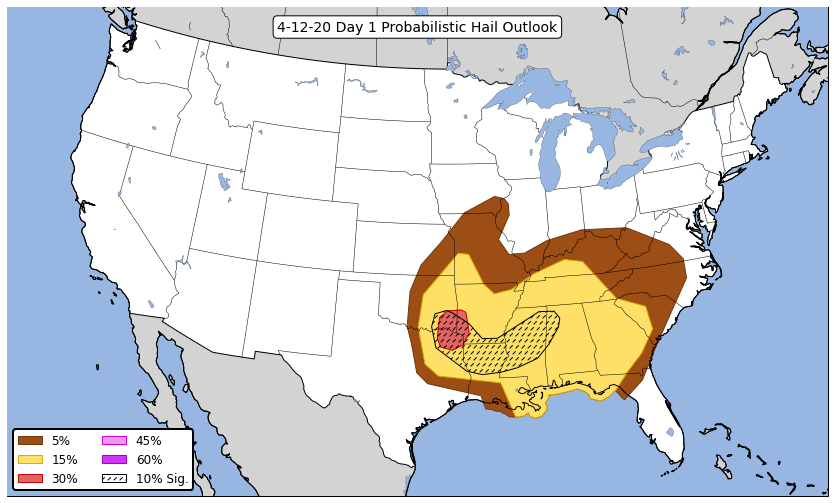

In [4]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

hail = Day1ConvectiveOutlookFeature(1630,2020,4,12,'hail', zorder=3)
sighail = Day1ConvectiveOutlookFeature(1630,2020,4,12,'sighail', zorder=3)

ax.add_feature(hail)
ax.add_feature(sighail)

leg = SPCLegend.convectiveHail()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-12-20 Day 1 Probabilistic Hail Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

#### Day 1 Probabilistic Wind

Text(0.5, 0.95, '4-12-20 Day 1 Probabilistic Wind Outlook')

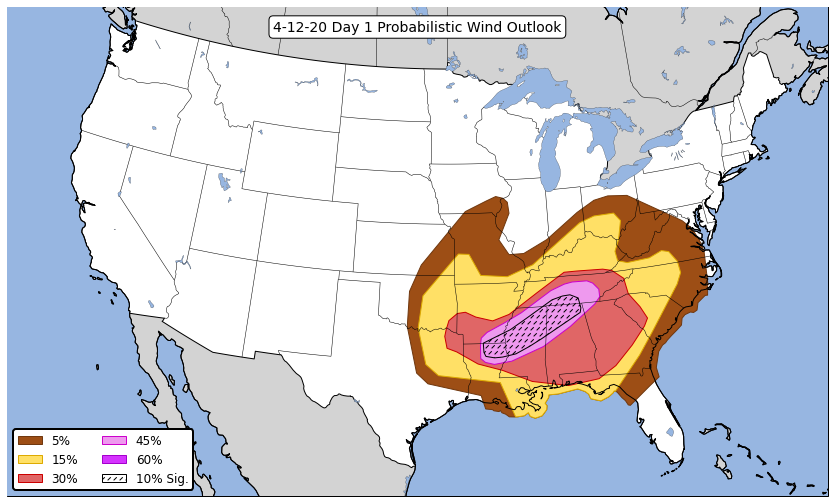

In [5]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

wind = Day1ConvectiveOutlookFeature(1630,2020,4,12,'wind', zorder=3)
sigwind = Day1ConvectiveOutlookFeature(1630,2020,4,12,'sigwind', zorder=3)

ax.add_feature(wind)
ax.add_feature(sigwind)

leg = SPCLegend.convectiveWind()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-12-20 Day 1 Probabilistic Wind Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

#### Day 1 Probabilistic Tornado

Text(0.5, 0.95, '4-12-20 Day 1 Probabilistic Tornado Outlook')

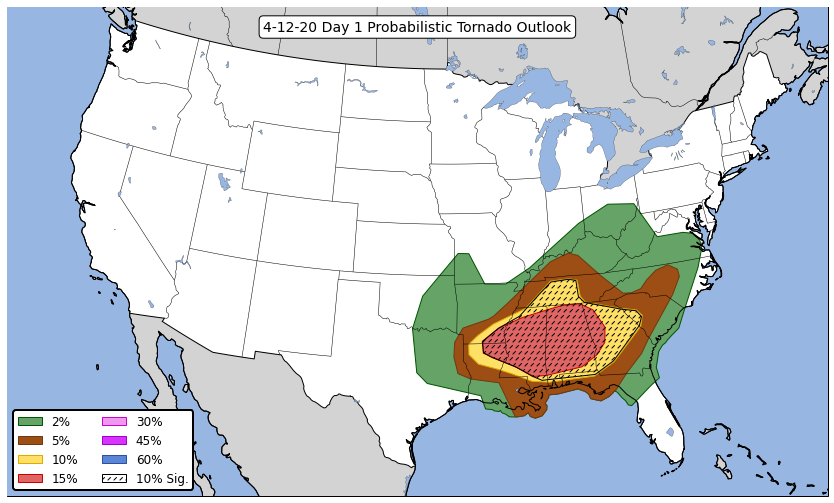

In [6]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

torn = Day1ConvectiveOutlookFeature(1630,2020,4,12,'torn', zorder=3)
sigtorn = Day1ConvectiveOutlookFeature(1630,2020,4,12,'sigtorn', zorder=3)

ax.add_feature(torn)
ax.add_feature(sigtorn)

leg = SPCLegend.convectiveTornado()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-12-20 Day 1 Probabilistic Tornado Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

#### Day 2 Categorical

Text(0.5, 0.95, '4-11-20 Day 2 Categorical Convective Outlook')

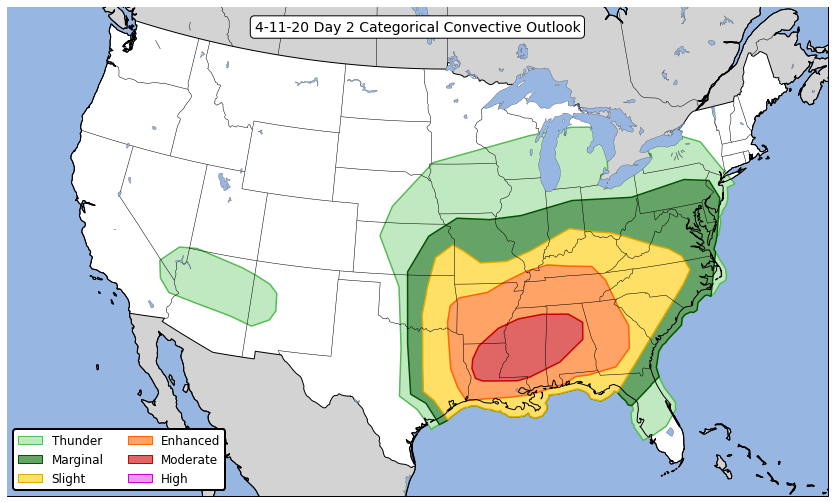

In [7]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

cof = Day2ConvectiveOutlookFeature(1730,2020,4,11,'cat', zorder=3, linewidth=1.5)
ax.add_feature(cof)

leg = SPCLegend.convectiveCategorical()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-11-20 Day 2 Categorical Convective Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

#### Day 2 Probabilistic Tornado

Text(0.5, 0.95, '4-12-20 Day 2 Probabilistic Tornado Outlook')

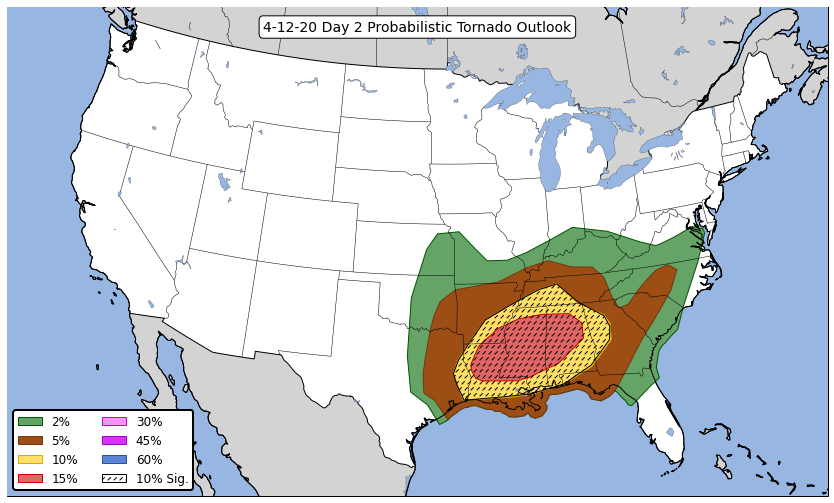

In [8]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

torn = Day2ConvectiveOutlookFeature(1730,2020,4,11,'torn', zorder=3)
sigtorn = Day2ConvectiveOutlookFeature(1730,2020,4,11,'sigtorn', zorder=3)

ax.add_feature(torn)
ax.add_feature(sigtorn)

leg = SPCLegend.convectiveTornado()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-12-20 Day 2 Probabilistic Tornado Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

##### A NOTE FOR DAY 2 OUTLOOKS

On **January 30, 2020** the Day 2 convective outlooks began including individual hazard probabilities instead of probabilities for *any* severe weather. This means that Day 2 outlooks that were issued before the above date are not going to have the same syntax as the previous example. Instead, they will take the same arguments as Day 3 outlooks, which can be seen in the example below.

#### Day 3 Categorical

Text(0.5, 0.95, '4-10-20 Day 3 Categorical Convective Outlook')

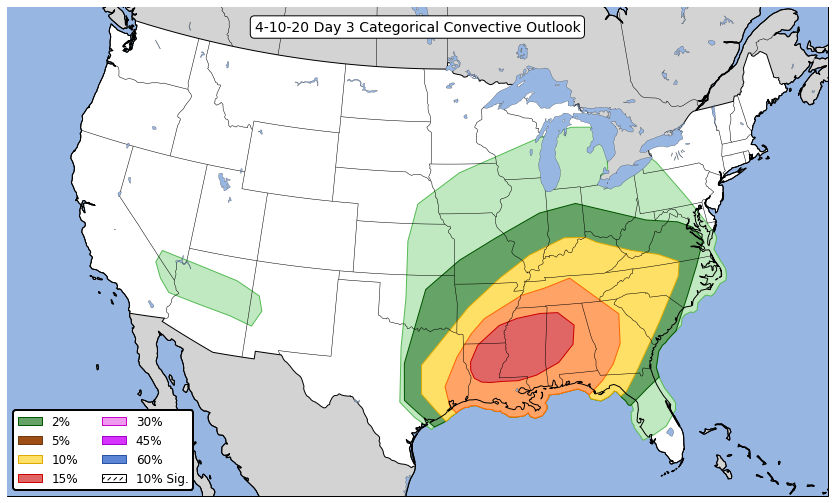

In [9]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

cof = Day3ConvectiveOutlookFeature(730,2020,4,10,'cat', zorder=3)

ax.add_feature(cof)

leg = SPCLegend.convectiveTornado()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-10-20 Day 3 Categorical Convective Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

#### Day 3 Probabilistic Severe

Text(0.5, 0.95, '4-10-20 Day 3 Probabilistic Severe Outlook')

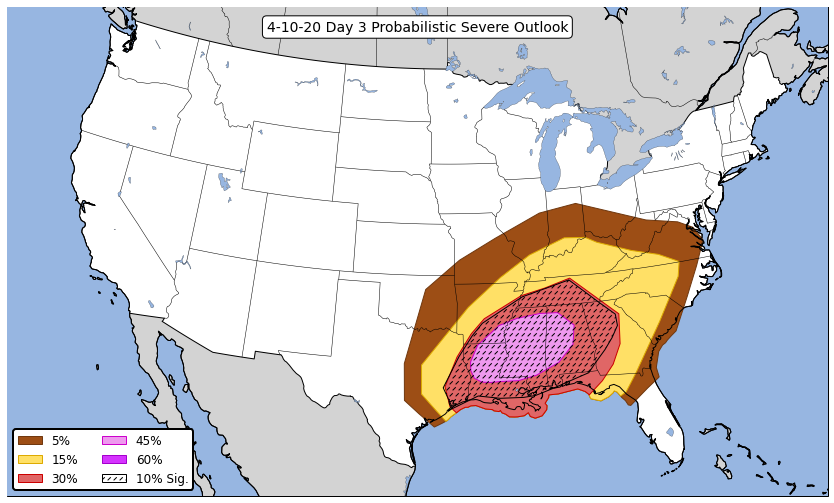

In [10]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

prob = Day3ConvectiveOutlookFeature(730,2020,4,10,'prob', zorder=3)
sigprob = Day3ConvectiveOutlookFeature(730,2020,4,10,'sigprob', zorder=3)

ax.add_feature(prob)
ax.add_feature(sigprob)

leg = SPCLegend.convectiveAllHazards()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-10-20 Day 3 Probabilistic Severe Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

#### Day 4 Probabilistic Severe

Text(0.5, 0.95, '4-9-20 Day 4 Probabilistic Severe Outlook')

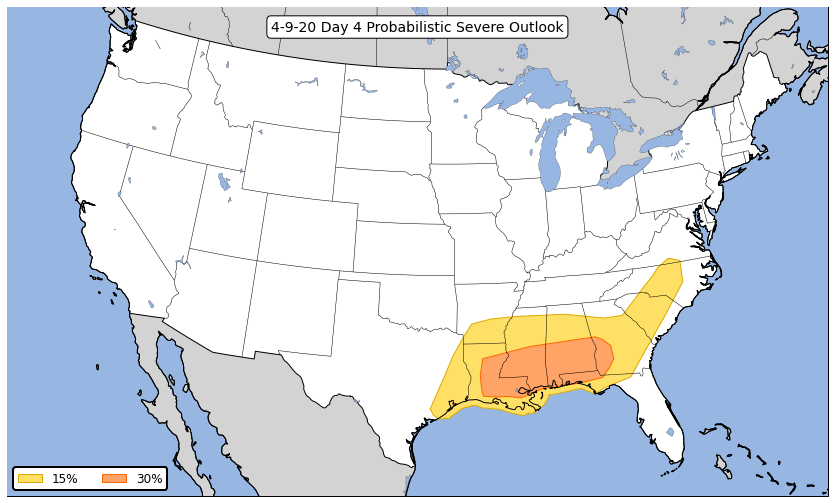

In [11]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

cof = Day4ConvectiveOutlookFeature(2020,4,9,zorder=3)

ax.add_feature(cof)

leg = SPCLegend.convectiveExtended()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-9-20 Day 4 Probabilistic Severe Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)

#### Day 5 Probabilistic Severe

/home/nawendt/miniconda3/envs/spc/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://www.spc.noaa.gov/products/exper/day4-8/archive/2020/day5prob_20200408.lyr.geojson
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


Text(0.5, 0.95, '4-8-20 Day 5 Probabilistic Severe Outlook')

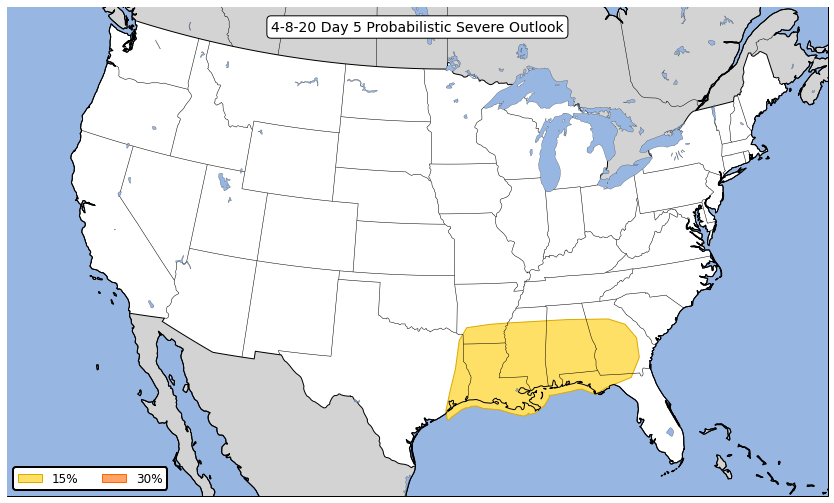

In [12]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': PROJ}, figsize=(16,9))

countries = shapereader.natural_earth(category='cultural',
                                      resolution='50m',
                                      name='admin_0_countries')
for country in shapereader.Reader(countries).records():
    if country.attributes['NAME'] == 'United States of America':
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(), 
                          facecolor='white', 
                          edgecolor='none', 
                          zorder=3)
    else:
        ax.add_geometries([country.geometry],
                          crs=ccrs.PlateCarree(),
                          facecolor='lightgray',
                          edgecolor='none',
                          zorder=3)
    
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_1_states_provinces_lines',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='lakes',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black',
                                           linewidth=0.2),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='coastline',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=4)
ax.add_feature(feature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_boundary_lines_land',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black'),
                                           zorder=3)
ax.add_feature(feature.NaturalEarthFeature(category='physical',
                                           name='ocean',
                                           scale='50m',
                                           facecolor=COLORS['water'],
                                           edgecolor='black'),
                                           zorder=3)
ax.set_extent((-122,-72,22,50))

cof = Day5ConvectiveOutlookFeature(2020,4,8,zorder=3)

ax.add_feature(cof)

leg = SPCLegend.convectiveExtended()
lax = ax.legend(*leg, loc=3, ncol=2, framealpha=1, fontsize=12, edgecolor='black')
lax.get_frame().set_linewidth(2)

ax.text(0.5, 0.95, '4-8-20 Day 5 Probabilistic Severe Outlook', transform=ax.transAxes, fontsize=14, 
        horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='white', alpha=1), zorder=5)